# Alpha Testing

In [1]:
import os
import datetime
import pandas as pd
import numpy as np
from tqdm import tqdm
import joblib

from Alpha_Research import Alpha_Research

In [2]:
data_path = "data"
file_name = "data.sav"
file_path = os.path.join(data_path, file_name)
datas = joblib.load(file_path)
data_daily = datas[0]
data_monthly_acc = datas[1]
data_monthly_mkt = datas[2]

In [3]:
print("Daily: ", list(data_daily.keys()))
print("Monthly Accounting: ", list(data_monthly_acc.keys()))
print("Monthly Market: ", list(data_monthly_mkt.keys()))

Daily:  ['ADJO', 'ADJH', 'ADJL', 'ADJC', 'V']
Monthly Accounting:  ['GP', 'A', 'BPS', 'LOAN', 'GPM', 'OPM', 'ROA', 'ROE', 'SGA', 'DEBT', 'RETA', 'CFOP', 'SG', 'GPG', 'OPG', 'ATV', 'DIV', 'DPO']
Monthly Market:  ['CAP', 'P', 'ADV20', 'RET20', 'VOL20', 'AVG20', 'HIGH52', 'LOW52', 'BETA', 'V20', 'SIR', 'LCAP', 'NOS', 'RET1W', 'RET3M', 'RET6M', 'RET1Y', 'VOL5', 'VOL60', 'VOL120', 'VOL52', 'ADV52', 'ANREV', 'ANDEV']


In [4]:
ar = Alpha_Research()

In [5]:
features = [ar.monthly_resampling(data_daily['ADJC'].diff(10))]
def operation(features):
    return (features[0]).rank(pct=True)

                 2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
Min Long Count     64    63    63    63    82    84    91    95    96    95   
Min Short Count    64    63    63    62    82    84    91    94    95    95   

                 2020  2021  2022  2023  
Min Long Count     95    95    96    94  
Min Short Count    95    95    96    94  


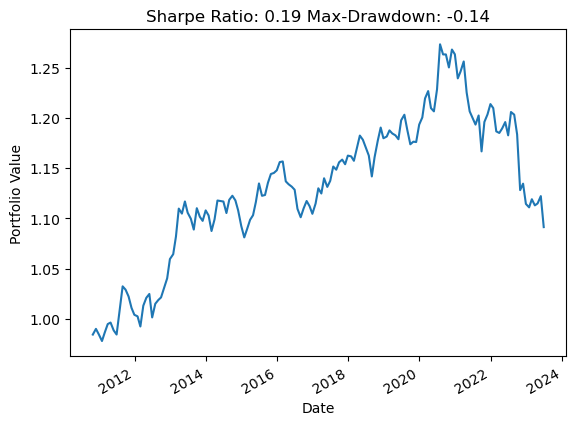

In [6]:
bt, w = ar.backtest(features, operation, chart=True)